# CORDATA data filtering and processing

In [1]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in file
# Load the dictionary 
avionic_dataset = pd.read_excel('../../inhibitors/CORDATA/avionics_dataset.xlsx') 

print(avionic_dataset.shape)
print(avionic_dataset.columns)
description = avionic_dataset.describe()

(125, 9)
Index(['Index', 'Inhibitor', 'Metal', 'Alloy', 'Temperature_K', 'pH',
       'Salt_Concentration', 'Efficiency', 'Smiles'],
      dtype='object')


In [3]:
# Print the dataset
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS


In [4]:
# process rows wanted
print(description)

            Index  Temperature_K  Salt_Concentration  Efficiency
count  125.000000     125.000000          125.000000  125.000000
mean    63.000000     300.064000            0.176640   95.240160
std     36.228442       4.437276            0.240356    3.449144
min      1.000000     293.000000            0.010000   90.000000
25%     32.000000     298.000000            0.010000   92.000000
50%     63.000000     298.000000            0.050000   95.020000
75%     94.000000     301.000000            0.100000   98.300000
max    125.000000     328.000000            0.600000  100.000000


In [5]:
# gather data for plot
# here temperature
temperature = avionic_dataset["Temperature_K"]
efficiency = avionic_dataset["Efficiency"]


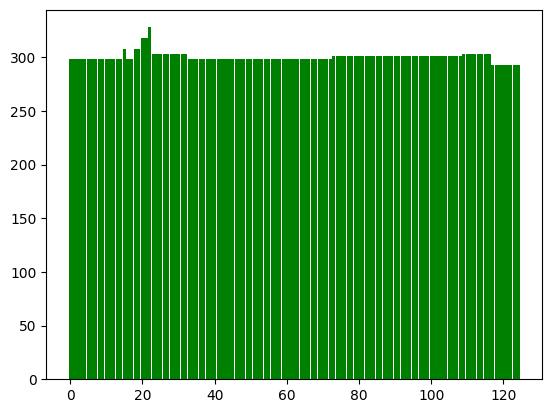

In [6]:
#plot - temperature
index = np.arange(len(temperature))
bar_width = 0.9
plt.bar(index, temperature, bar_width,  color="green")
plt.show()

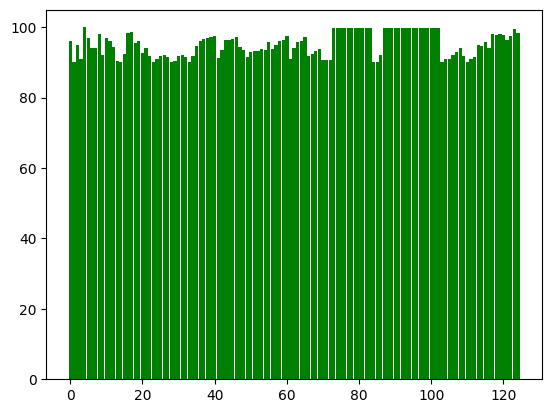

In [7]:
#plot - temperature
index = np.arange(len(efficiency))
bar_width = 0.9
plt.bar(index, efficiency, bar_width,  color="green")
plt.show()

## Parse smiles

In [8]:
# check if datamol-io is installed
!pip install datamol

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import datamol as dm

In [10]:
avionic_dataset["Mol"] = avionic_dataset["Smiles"].apply(dm.to_mol)

In [11]:
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112c70>
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112ce0>
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112d50>
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112dc0>
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112e30>


In [12]:
avionic_dataset["Descriptors"] = avionic_dataset["Mol"].apply(dm.descriptors.compute_many_descriptors)
    

In [13]:
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol,Descriptors
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112c70>,"{'mw': 91.993200368, 'fsp3': 0.5, 'n_lipinski_..."
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112ce0>,"{'mw': 150.025169192, 'fsp3': 0.0, 'n_lipinski..."
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112d50>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_..."
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112dc0>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_..."
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f9f83112e30>,"{'mw': 106.008850432, 'fsp3': 0.66666666666666..."
